# Initialize the controller

In [2]:
import sys
sys.path.append("..")
import matplotlib
%matplotlib notebook
import matplotlib.pyplot as plt
from LowLevelModules.GeneralFunctions import *
import numpy as np
import time
from LowLevelModules.Instruments import LakeShore335

lakeshore = LakeShore335('GPIB0::12::INSTR')
print("Shield: ", lakeshore.get_temp("A"), " K \nSample: ", lakeshore.get_temp("B"), " K")

Shield:  19.039  K 
Sample:  166.38  K


# Set temperature and heater property

In [3]:
lakeshore.set_target_temperature(294)
#lakeshore.set_heater_range('low') 
lakeshore.turn_heater_off()

# Record temperature over time

<IPython.core.display.Javascript object>


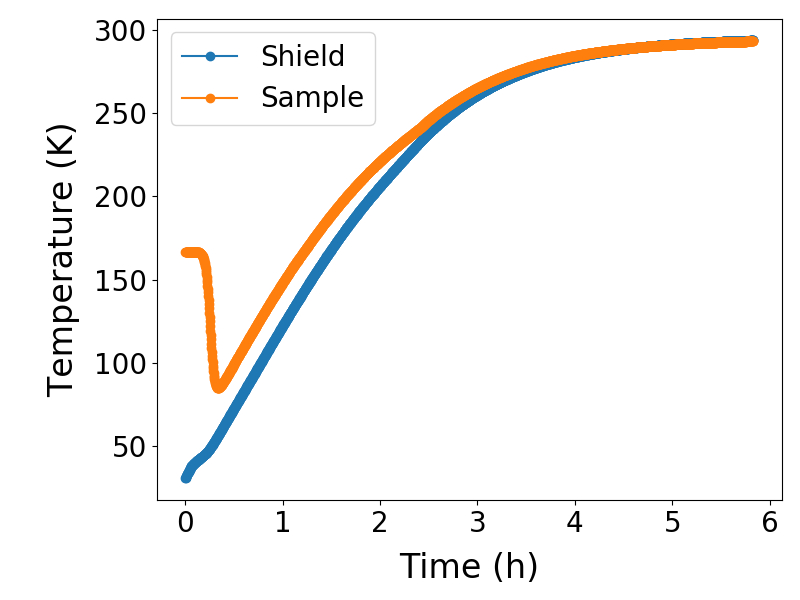

In [6]:
"""#######################################   USER INPUT   #################################################"""
save_data = True
collection_time = 10  #seconds

"""#########################################################################################################"""

# initialize the rest
lp = LivePlot(1, 2, 8, 6, 'o', 'Time (h)', 'Temperature (K)')
ti, Ta, Tb = [], [], []
t_now = 0
while True:
    try:
        ti.append(t_now/3600)
        Ta.append(lakeshore.get_temp("A"))
        Tb.append(lakeshore.get_temp("B"))
        print("Shield: "+ str(lakeshore.get_temp("A")) + " K. Sample: " + str(lakeshore.get_temp("B")) + " K    ", end="\r")
        lp.plot_live(ti,Ta, Tb)
        time.sleep(collection_time)
        t_now += collection_time
        lp.ax1.legend(['Shield', 'Sample'], fontsize=20)
    except KeyboardInterrupt:
        break

plt.show()
if save_data:
    data_type = 'Cryostat'
    data_header = "Time (h)                   Temp_A (K)                      Temp_B (K)"
    data_array = np.array([ti, Ta, Tb]).T
    data_save(data_array, lp.fig, data_type, data_header)

In [3]:
lakeshore.equipment.close()